In [21]:
import matplotlib.pyplot as plt
import statistics
from helpers import *
import pandas as pd

# Data Visualisation

This file contains all the relevant way we tried to visualise our data. We used the Pandas library to ease the visualisation through DataFrame.

In [24]:
#load the data
matrix, ids = load_data_set('alpha', 'wl2', 'train', 0.05, path=r'datamatrix/')

#create the DataFrame
datafr = pd.DataFrame(matrix)
print(datafr)
print("IDs: ", ids)

             0             1             2         3         4      \
0    -4.316266e-07 -3.332942e-07 -3.977652e-07  0.058493  0.050543   
1    -5.958160e-07 -4.823875e-07 -5.426526e-07  0.084415  0.070578   
2    -4.649459e-07 -3.436492e-07 -3.797645e-07  0.060525  0.059101   
3    -5.951432e-07 -4.412945e-07 -5.896003e-07  0.066301  0.065708   
4    -3.413052e-07 -2.372451e-07 -2.858193e-07  0.059785  0.049143   
...            ...           ...           ...       ...       ...   
1919 -2.204950e-07 -4.446359e-08  8.978914e-03  0.034782  0.027982   
1920 -9.035643e-08  2.105132e-08  1.520781e-02  0.034616  0.025625   
1921 -2.302914e-07 -1.331234e-07  3.851952e-03  0.046174  0.037066   
1922 -9.962959e-08 -7.632487e-08  9.823544e-03  0.035453  0.030164   
1923 -4.744733e-08 -1.621995e-07  1.153118e-02  0.036178  0.030670   

             5             6             7         8             9      ...  \
0     1.299427e-02 -2.062539e-07 -3.096156e-07  0.034633 -4.014258e-07  ...   
1

As we can see we have a huge data set containing a lot of features (10'878). As the IDs repeat itself multiple times due to the number of epoch of each individual, it also multiplies our number of rows.

In [67]:
#Search how many epochs has each individu and from which line to which line they are
stor=np.zeros((84,4), np.int64)
i=0
j=0
ID=0
for index, value in enumerate(ids):
    if index==0:
        ID=value
        stor[i][j]=value
    else:
        if ID!=value:
            stor[i][j+2]=index-1
            stor[i][j+3]=stor[i][2]-stor[i][1]+1
            i+=1
            ID=value
            stor[i][j]=value
            stor[i][j+1]=index

stor[i][j+2]=len(ids)
stor[i][j+3]=stor[i][2]-stor[i][1]+1

print(stor)

[[146129      0     18     19]
 [140117     19     37     19]
 [158136     38     58     21]
 [149741     59     80     22]
 [162026     81    102     22]
 [153732    103    124     22]
 [108323    125    147     23]
 [105923    148    170     23]
 [162935    171    193     23]
 [111514    194    216     23]
 [100307    217    240     24]
 [116726    241    264     24]
 [156334    265    288     24]
 [113922    289    312     24]
 [164636    313    336     24]
 [102816    337    360     24]
 [112920    361    384     24]
 [109123    385    407     23]
 [133019    408    431     24]
 [106521    432    454     23]
 [154532    455    478     24]
 [233326    479    499     21]
 [283543    500    521     22]
 [433839    522    545     24]
 [191033    546    569     24]
 [255639    570    593     24]
 [293748    594    617     24]
 [181232    618    641     24]
 [177746    642    665     24]
 [191841    666    688     23]
 [559053    689    712     24]
 [169040    713    736     24]
 [175237

For example, we can see on this table, the last row, that the smaller number of epochs per individual is 19.

Our first idea to visualise the data was to plot them inside a boxplot. However, with the high number of features it was unreadable. So we think of a way to diminish the number of feature to have a more handle data set but without loosing too much information. The two approaches we thought about to diminish the data set was to remove features with the lowest variance and remove/modify outliers.

## Impact of removing features with low variance on the data sets

First, we needed to have a feeling on which range is the variance.

In [111]:
#Search for the columns with the lowest variance: under 5*10^-6 (value chosen in function of the median value)
variance = datafr.var(axis=0)#axis=0 otherwise on lines
print("min variance = ",min(variance))
print("max variance = ",max(variance))
print("median value = ", statistics.median(map(float, variance)))

#create a dictionnary to order the variance to determine the lower and higher value
dico=dict(list(enumerate(variance)))
sorted_variance = sorted(dico.items(), key=lambda x:x[1])

#two to select the features. The first one, that we will use in the following, store the features with a variance lower than the threshold chosen (here 1.6*10**-3). The other way is to keep the features with variance above a certain threshold (here 1*10**-3).
selected_col =[key for key, value in dico.items()
                if value < 1.2*10**-3   ]


selected_colmax =[key for key, value in dico.items()
                if value > 1.2*10**-3]

print("Columns below ", 1.2*10**-3, ":",len(selected_col))
print("Columns above ", 1.2*10**-3, ":",len(selected_colmax))

min variance =  1.4891668939840939e-09
max variance =  0.0015491963154453173
median value =  2.404507034862847e-05
Columns below  0.0012 : 10862
Columns above  0.0012 : 16


However, we have to be careful with these values as they are specific to a data set loaded (depends on a sparsity parameter, band, and regularization). The threshold found need to be verified on the whole data.

In [114]:
#remove column with slow variance and small check to verify the output
datafr_withoutvar=datafr.drop(selected_col, axis=1)
print("Before removing columns, we have ",len(datafr.columns), " features")
print("After removing columns, we have ",len(datafr_withoutvar.columns)," features")
#check if the remaining columns' variance are far or close to the threshold chosen.
print("The remaining columns have a variance of: ")
print(datafr_withoutvar.var())

Before removing columns, we have  10878  features
After removing columns, we have  16  features
The remaining columns have a variance of: 
195      0.001417
2530     0.001549
3282     0.001477
3384     0.001242
3656     0.001352
3897     0.001248
4248     0.001455
4696     0.001275
4806     0.001366
8298     0.001335
8306     0.001265
9375     0.001349
9521     0.001337
9835     0.001294
9928     0.001246
10209    0.001324
dtype: float64


After checking that it was working, we code this function in the helper.py file. The function removes the columns on the train and on the test sets to keep a correspondance between the two. The variance is calculated on the train set.

In [37]:
from helpers import *
datafrr,datafrrtest=remove_col_lowvariance(datafr, datafr, 1*10**-3)
print(datafrr)

         195       466       1433      2137          2530      2788   \
0     0.083066  0.089622  0.065278  0.045835 -2.741890e-07  0.067106   
1     0.111487  0.114148  0.088598  0.079699 -3.445824e-07  0.125116   
2     0.095182  0.095231  0.089490  0.052165 -2.734933e-07  0.080997   
3     0.108470  0.109423  0.020104  0.057446 -4.075753e-07  0.105249   
4     0.090840  0.076856  0.009609  0.043863  4.419978e-03  0.079939   
...        ...       ...       ...       ...           ...       ...   
1919  0.044202  0.028457  0.062711  0.028796  3.962023e-02  0.027217   
1920  0.043853  0.028513  0.060170  0.026580  4.634136e-02  0.025430   
1921  0.067705  0.035501  0.063100  0.037724  5.509805e-02  0.042346   
1922  0.040167  0.030450  0.068392  0.029242  4.952491e-02  0.031697   
1923  0.038199  0.030698  0.052019  0.027721  3.282610e-02  0.026954   

         3282      3384      3634          3656   ...         9813   \
0     0.090228  0.031376  0.107879  3.319558e-02  ...  4.191949e

Now that have only 39 features with the most variance in the data, we can plot some graphs. We also think that lowering the number of features we use, will enhance the accuracy of our machine learning model. We will verify this assumption on the server with the whole data.

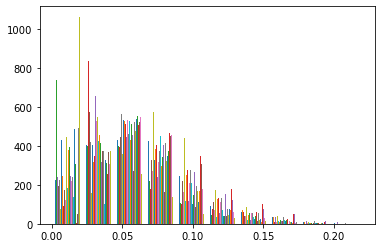

In [71]:
plt.hist(datafrr)
plt.show()

The first one we tried is a histogram. On this plot we can see that the remained features are most of them centered around 0.05 and with a similar standard deviation. However, they do not all reach the same height. Standardizing the data in our case should help us to have a better data set. In the following of the project, we will not code for a standardisation as it is provided by the different machine learning methods we will use.

Now we can try to plot the boxplot we wanted before.

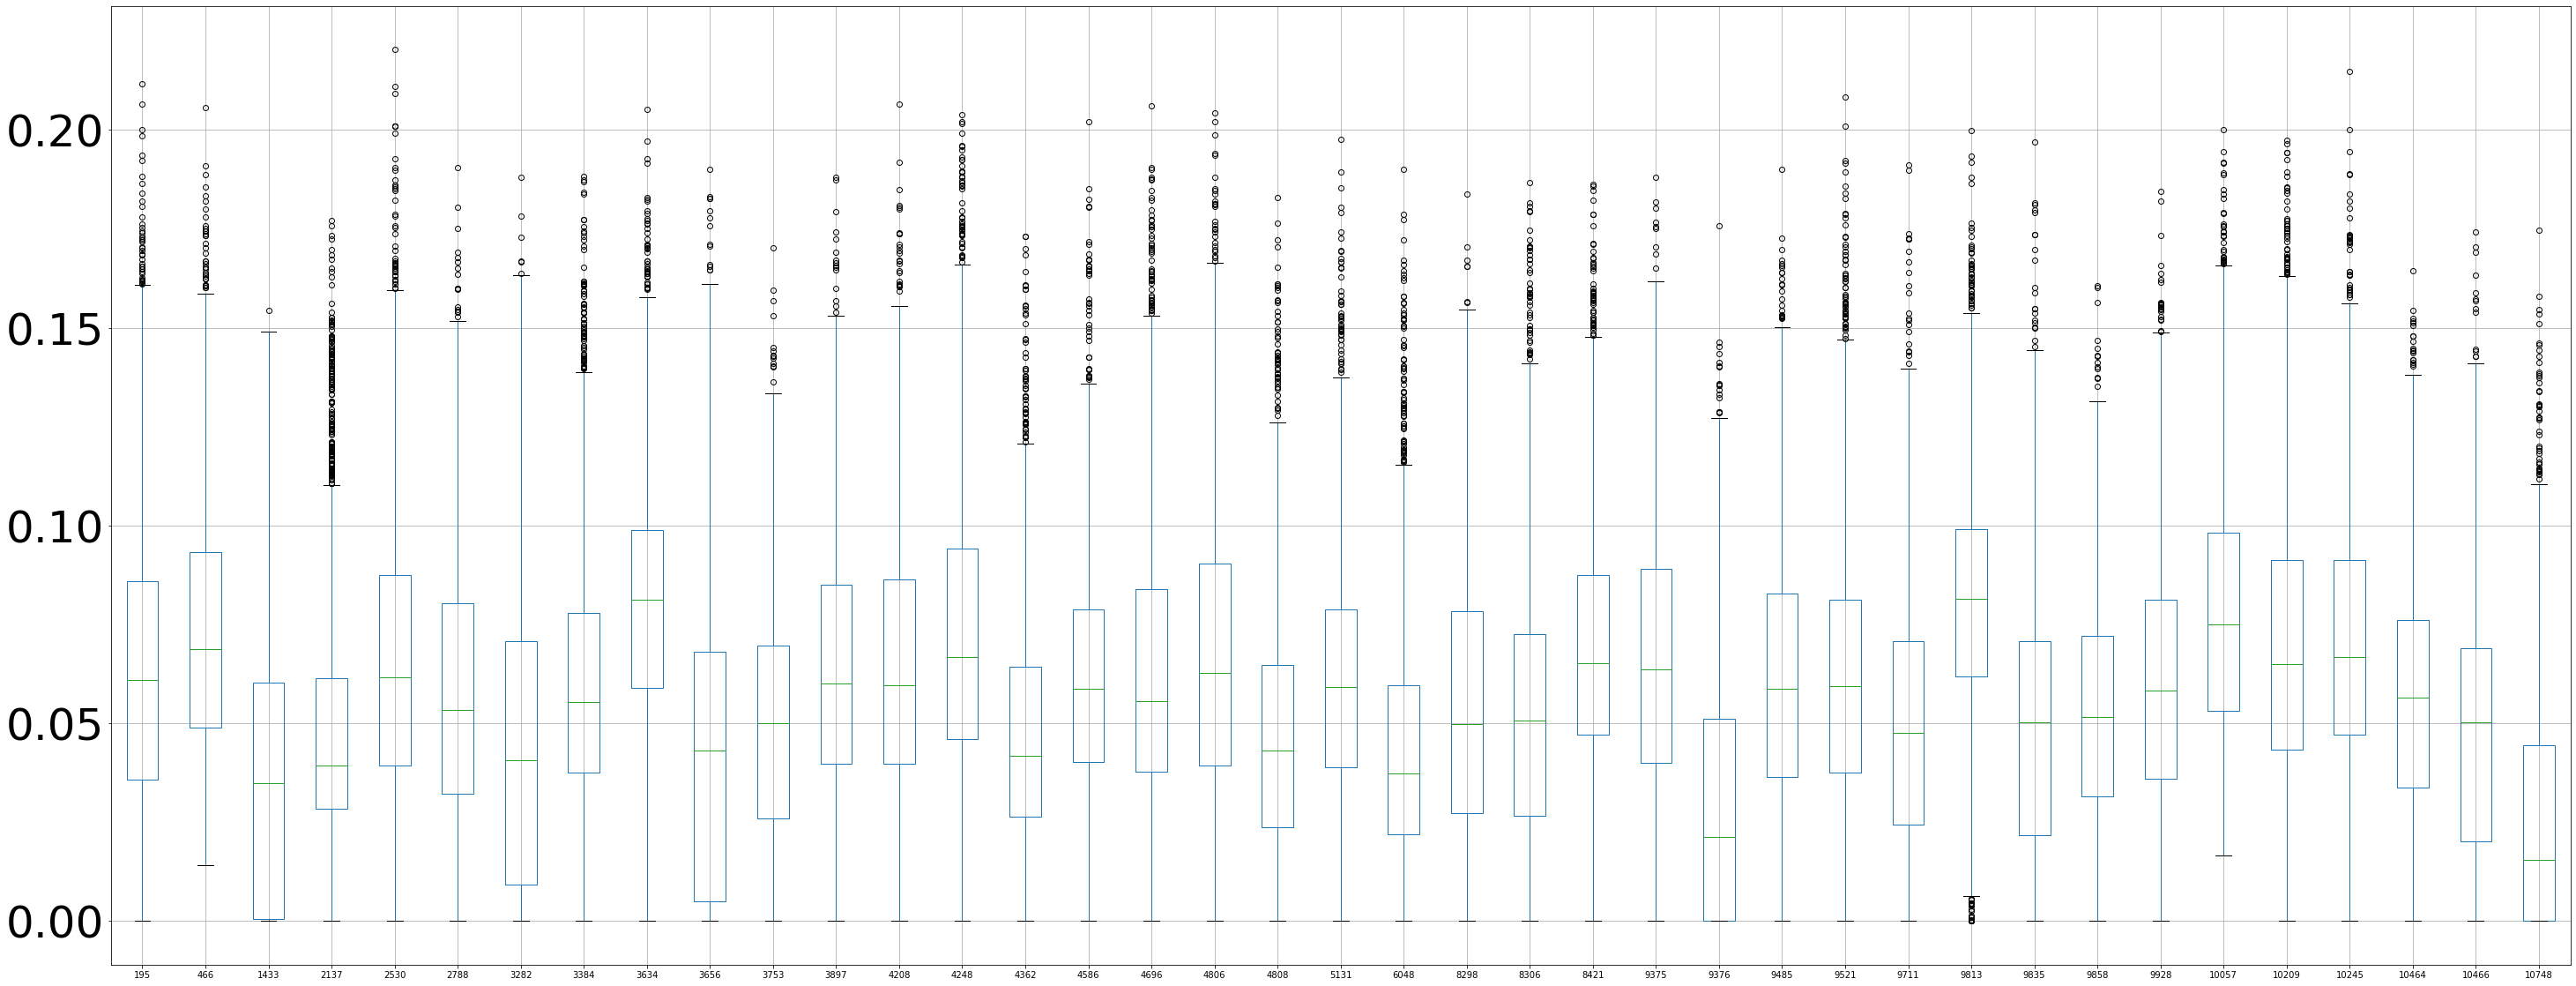

In [55]:
datafrr.boxplot(figsize=(50,20))
plt.tick_params(axis='y',labelsize=50)
plt.show()

With this graph, we can observe some outliers, mainly on the upper range. Which leads us to our second part of data preprocessing: managing the outliers.

## Impact of the outliers

In this part, we will see the impact on the data when we replace the outliers by either the median value of its corresponding column or by +/- 3*std or +/-2*std. We will use boxplot to qualifying the changements. During the project we will not have time to implement this solution to improve our accuracy.

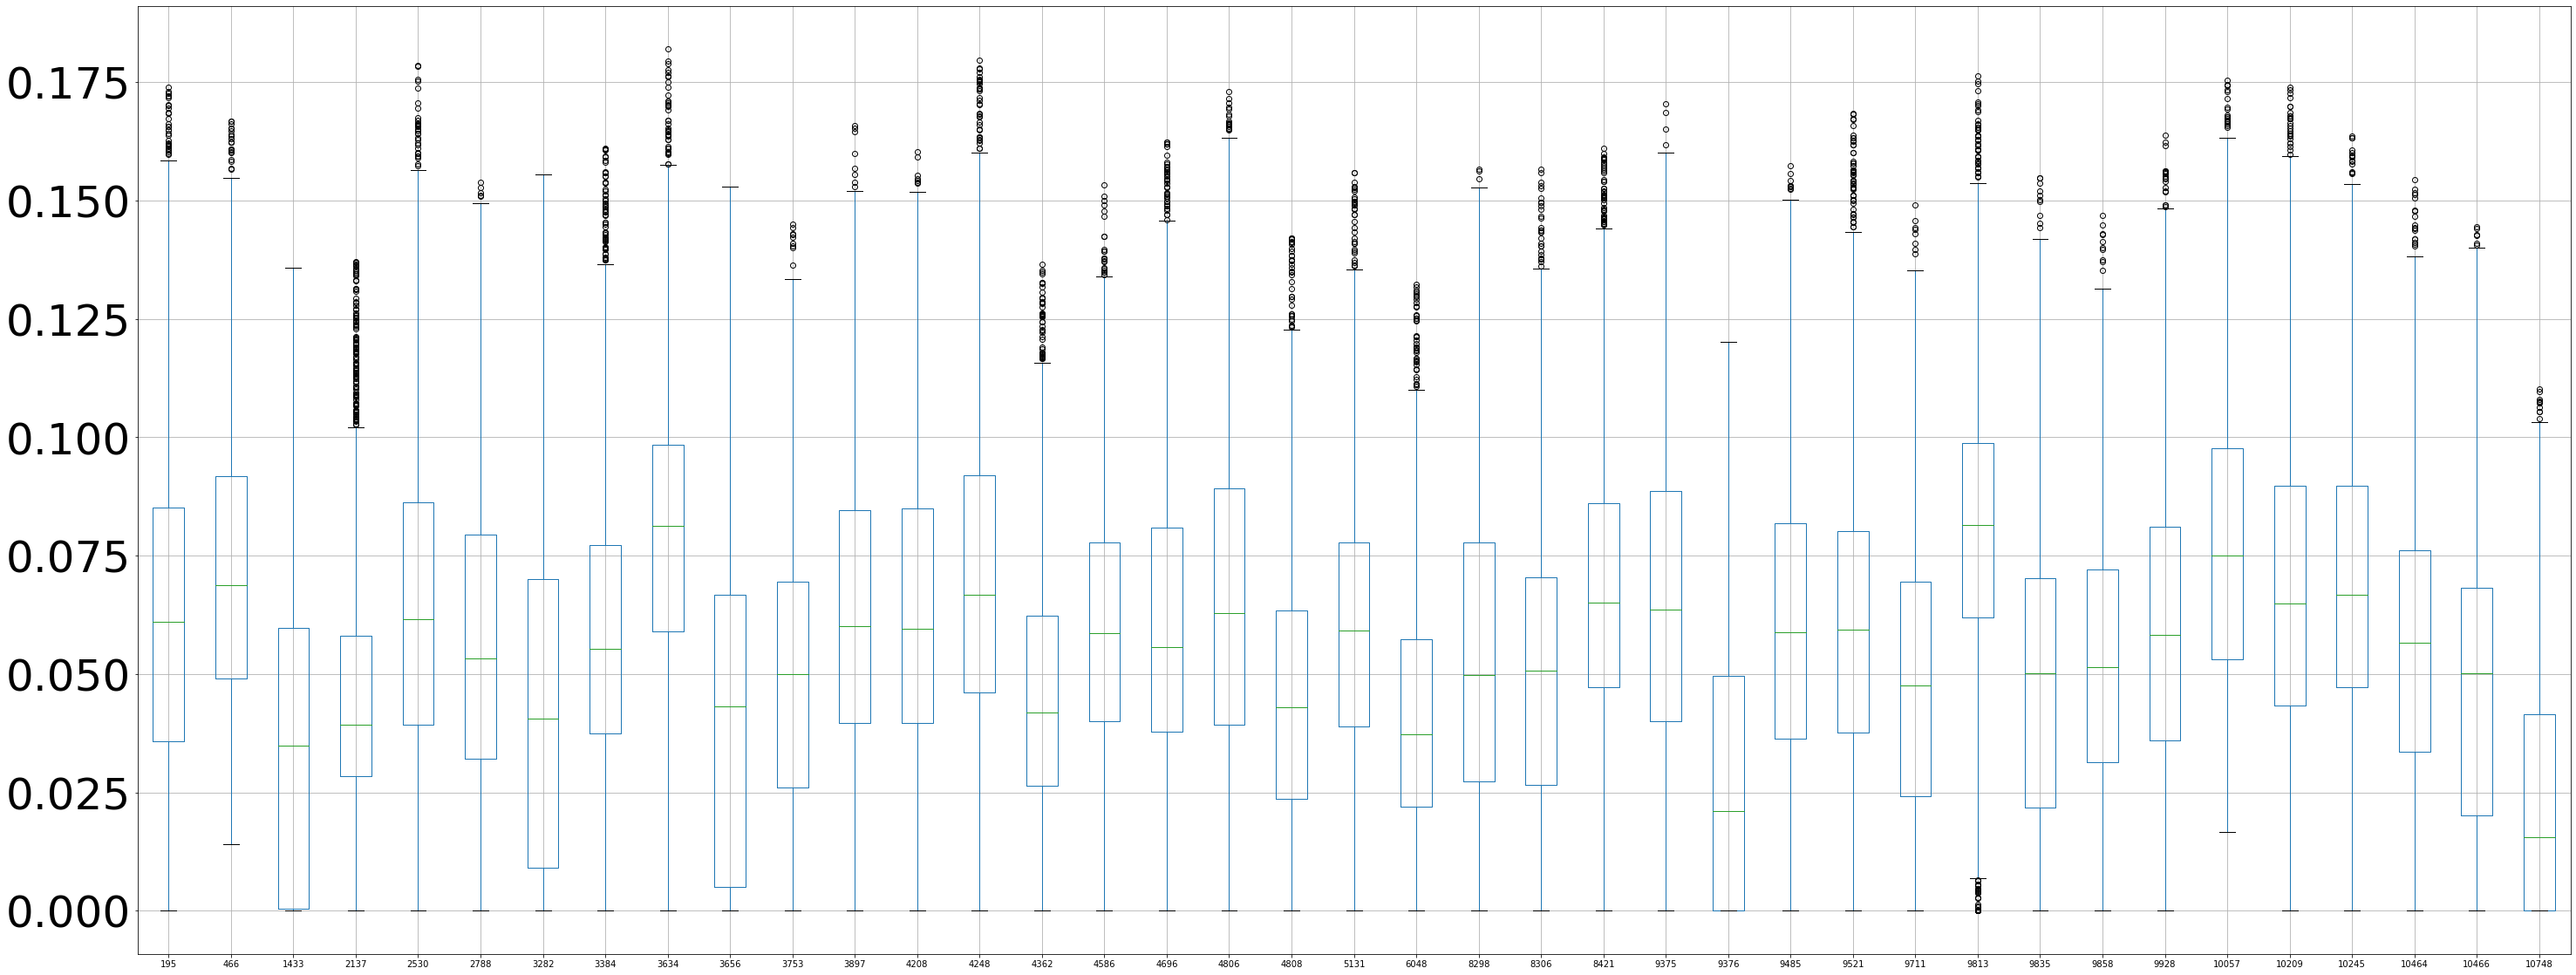

In [59]:
#outlier = median
median = datafrr.median()
std = datafrr.std()

value = datafrr

datafr_withoutvarf=datafrr.where(datafrr >= median - 3*std, median, axis=1)
datafr_withoutvarmed=datafr_withoutvarf.where(datafr_withoutvarf <= median + 3*std, median, axis=1)

datafr_withoutvarmed.boxplot(figsize=(50,20))
plt.tick_params(axis='y',labelsize=50)
plt.show()

We can see that the outliers are now closer to the boxes by looking at the y-axis.

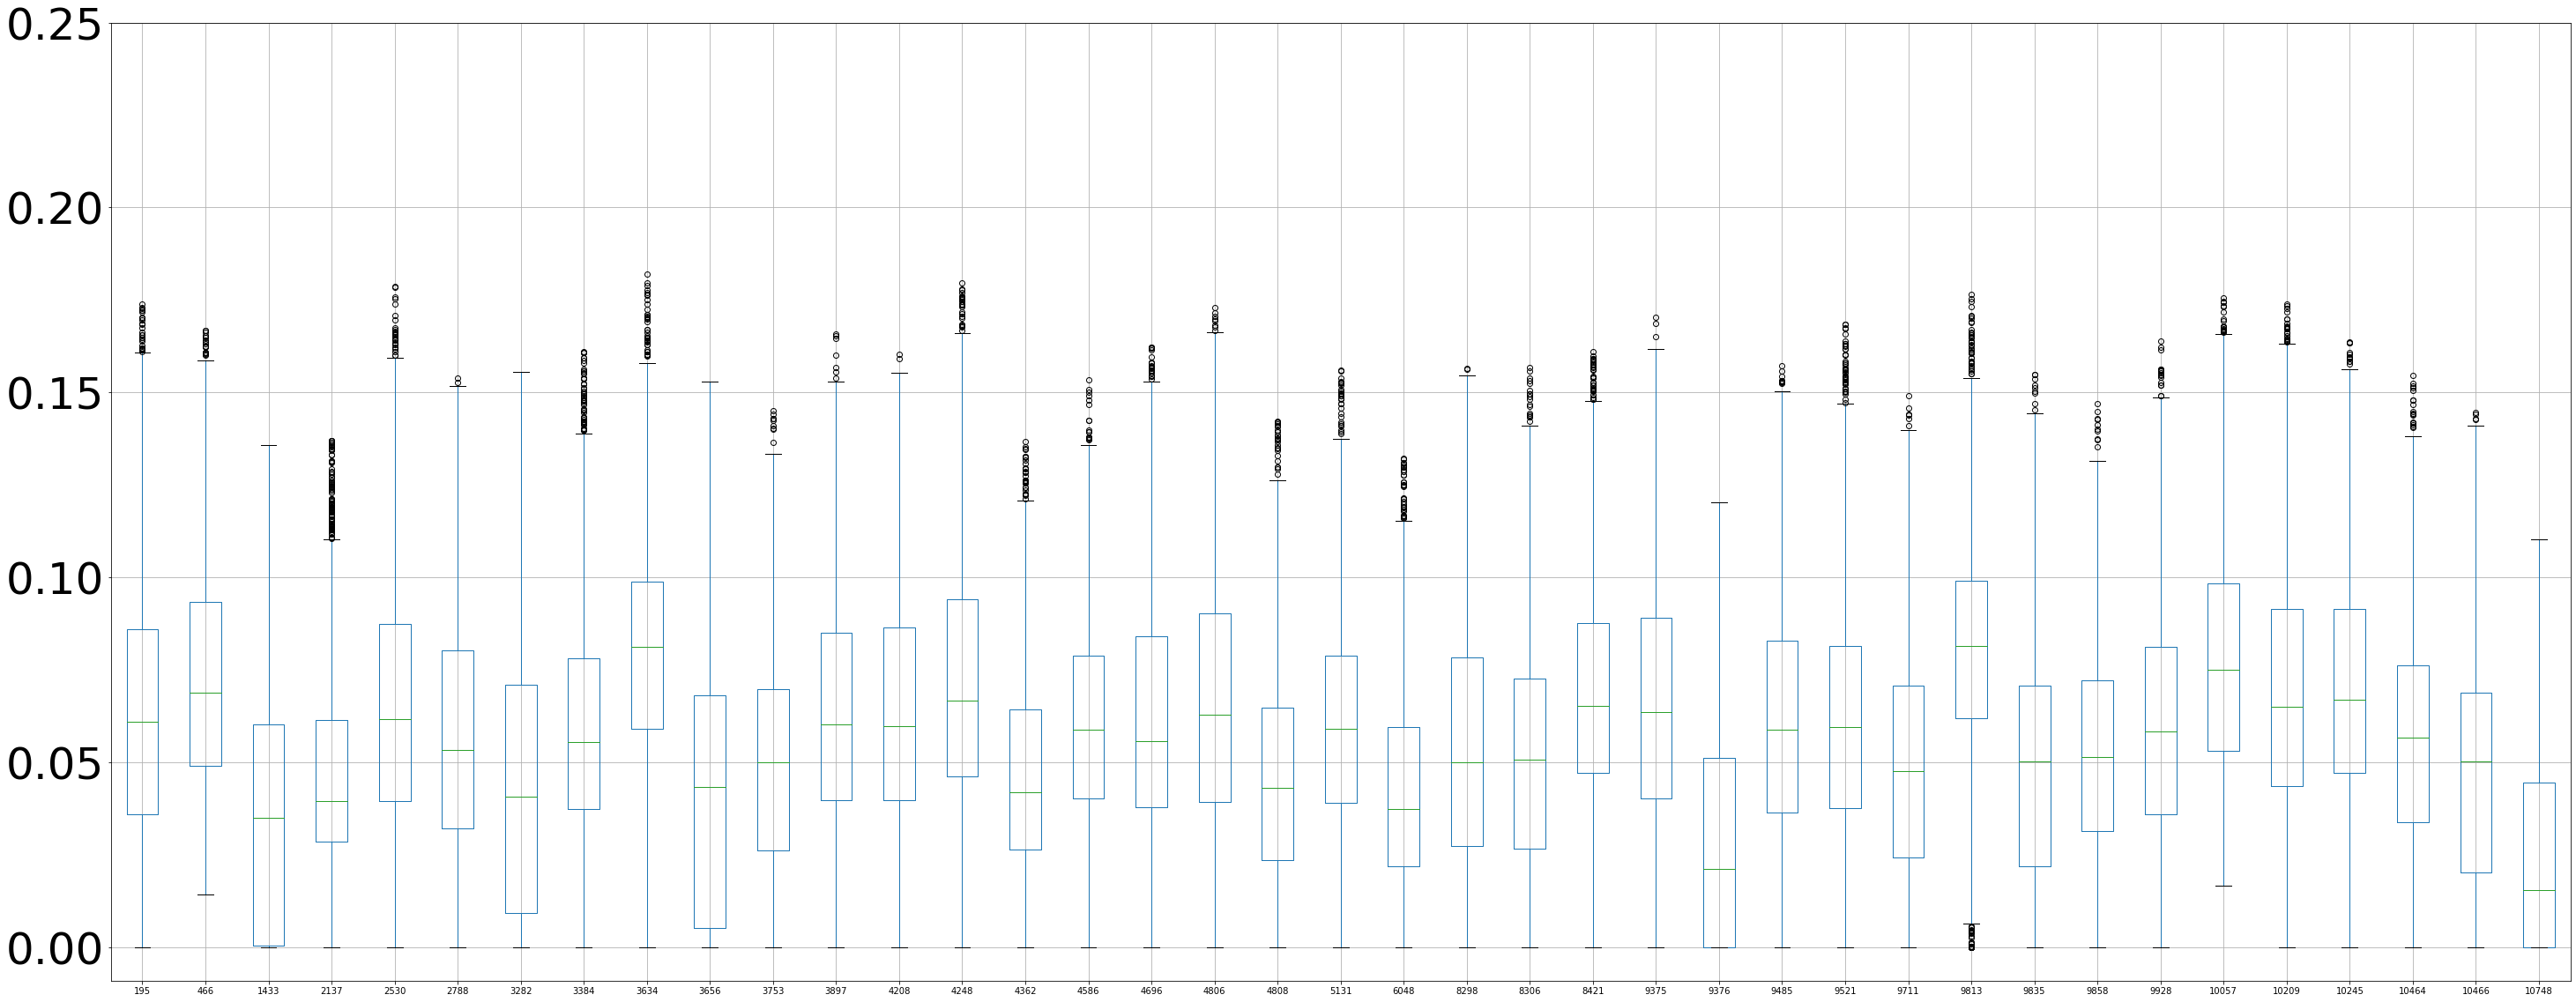

In [60]:
#remplaxe outliers by +/-3std
datafr_withoutvarf=datafrr.where(datafrr >= median - 3*std, -3*std, axis=1)
datafr_withoutvarff=datafr_withoutvarf.where(datafr_withoutvarf <= median + 3*std, 3*std, axis=1)
datafr_withoutvarff.boxplot(figsize=(50,20))
plt.tick_params(axis='y',labelsize=50)
plt.ylim(top = 0.25)
plt.show()

This plot looks quite similar to the previous one using the median value.

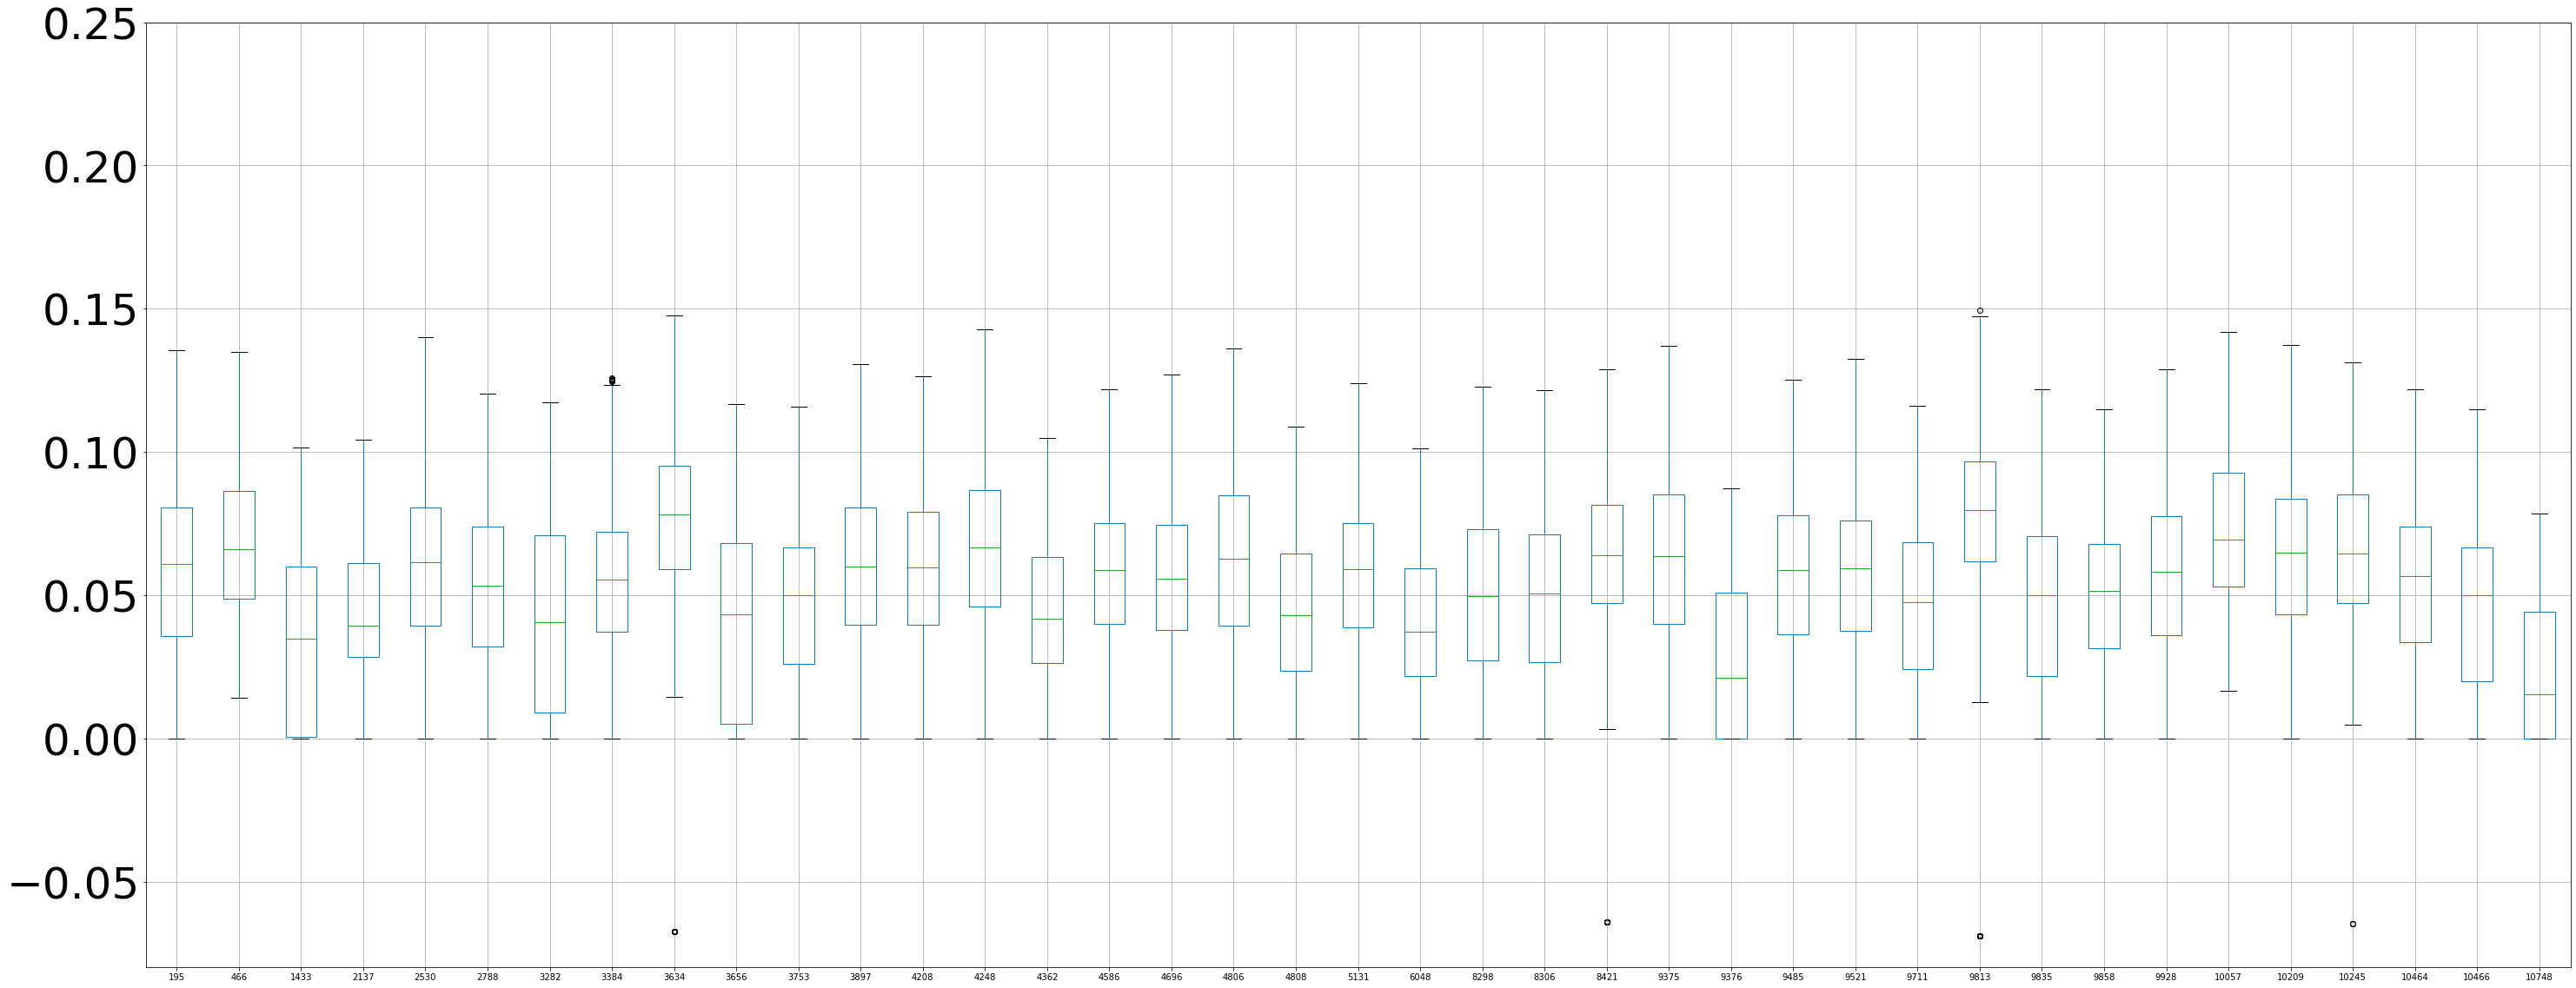

In [62]:
#remplaxe outliers by +/-2std
datafr_withoutvarf=datafrr.where(datafrr >= median - 2*std, -2*std, axis=1)
datafr_withoutvarstd=datafr_withoutvarf.where(datafr_withoutvarf <= median + 2*std, 2*std, axis=1)
datafr_withoutvarstd.boxplot(figsize=(50,20) )
plt.tick_params(axis='y',labelsize=50)
plt.ylim(top = 0.25)
plt.show()

Changing the outliers to +/-2*std, make them almost all disappear. However, the outliers previously hidden at the bottom are now far away from the boxes.

## Further data analysis

Then we wanted to see if one feature or epoch is more useful than another to do fingerprinting.

First, we tried to plot each epoch per individual and try to see a pattern between the plots.

In [82]:
#create sub dataframe with the features that have the most variance to keep only a lower number of features for plotting
datafr_varmax=datafr.iloc[:,selected_colmax]

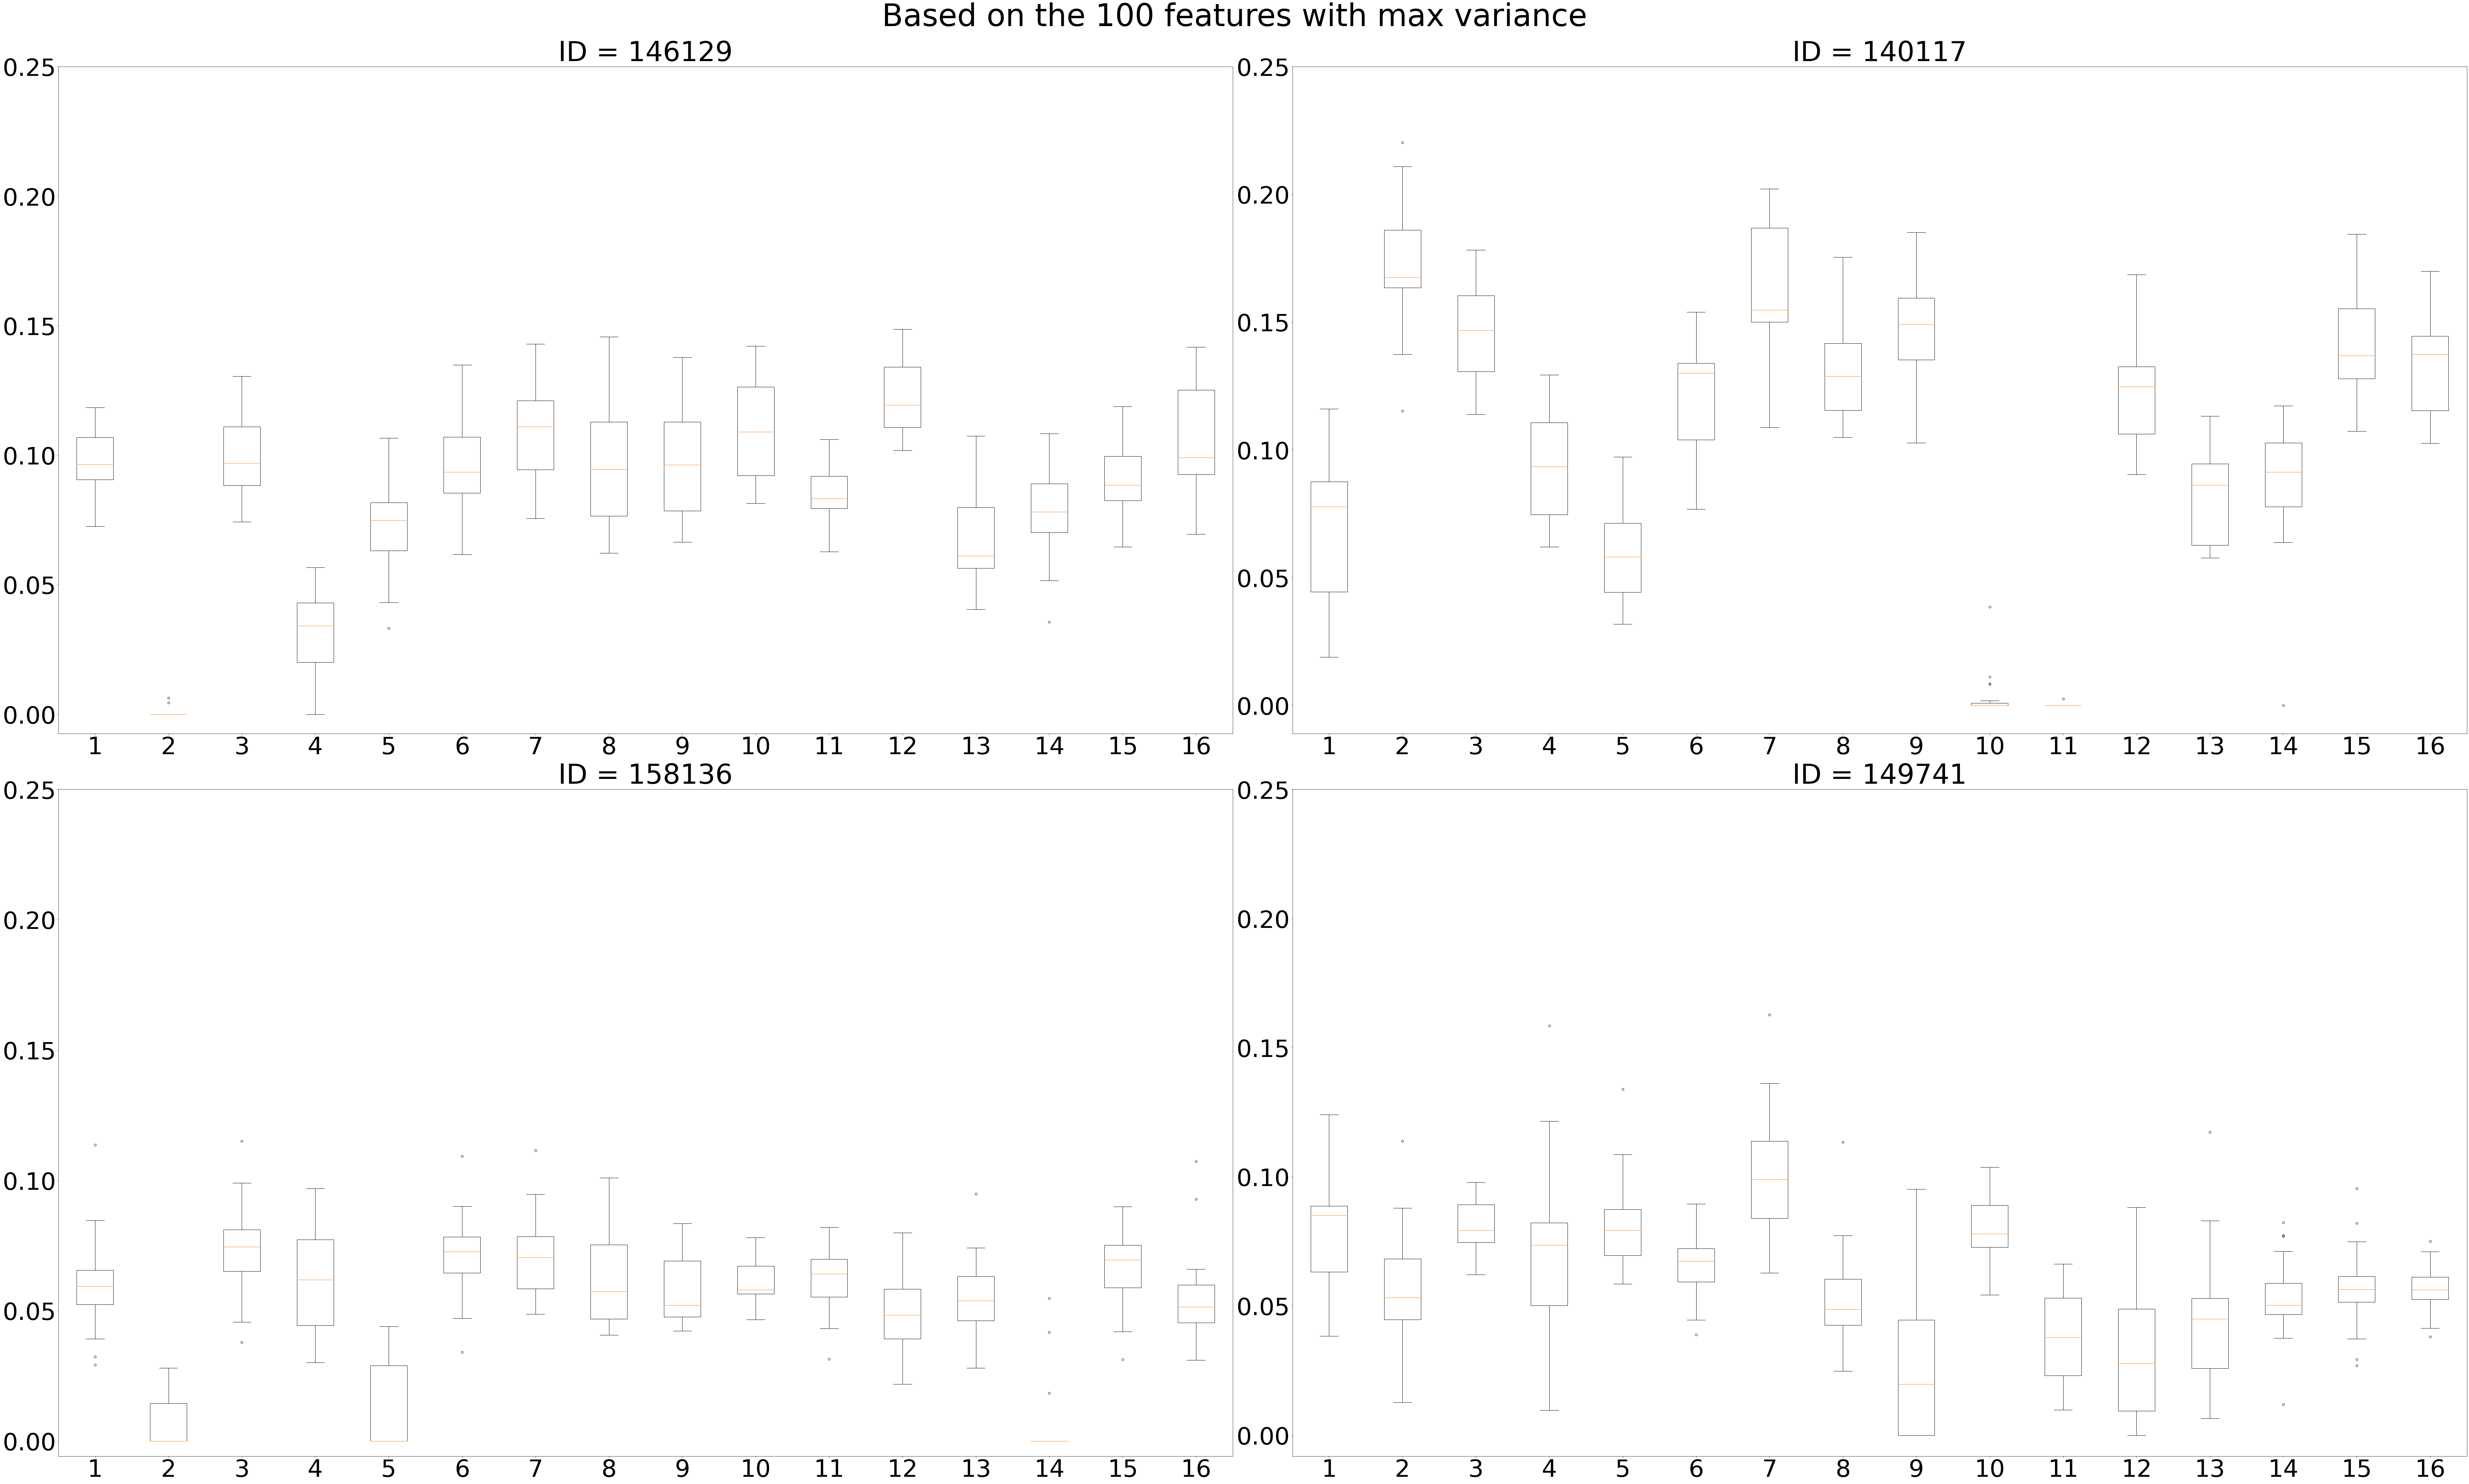

In [94]:
#create a boxplot for one individu with all its epochs
v=0
w=0
#moche + long à compiler car plus de 10'000 features -> need to concentrate on less features
#datafr.iloc[stor[v][w+1]:stor[v][w+2]+1].boxplot(figsize=(50,20))

fig, axes = plt.subplots(2,2)
fig.set_size_inches(100, 60)
for i in range(2):
    for j in range(2):
        name = 'ID = ' + str(stor[v][0])
        axes[i,j].set_title(name, size=80)
        axes[i,j].boxplot(x=datafr_varmax.iloc[stor[v][w+1]:stor[v][w+2]+1])
        v+=1

for ax in axes.flat:
   ax.set_ylim(top=0.25)
   ax.tick_params(labelsize=100)
   ax.tick_params(axis='y',labelsize=70)
   ax.tick_params(axis='x',labelsize=70)

fig.suptitle('Based on the 16 features with max variance', fontsize=90, y=1)
fig.tight_layout()
plt.show()


 Here we can see that each feature tends to change a lot between individual which means that they should be usefull to fingerprint these people. However, as we have less data these results are less representative to what happen in the whole data set.

## Other ideas

We had other ideas to explore more how the epoch could influence our data set but do to the short amount of time we preferred to concentrate on other part of the project. An idea was to plot all individual together in function of a specific period.

### Features ranking

We also wanted to do feature ranking, to analysed which features, so which brain activity, are more correlated to brain fingerprinting. However, first before using PCA, we need to pass some tests to be sure our results will have sense.

In [72]:
datafr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Columns: 10878 entries, 0 to 10877
dtypes: float64(10878)
memory usage: 159.7 MB


In [73]:
datafr.head()

,0,1,2,3,4,5,6,7,8,9,...,10868,10869,10870,10871,10872,10873,10874,10875,10876,10877
0,-4.316266e-07,-3.332942e-07,-3.977652e-07,0.058493,0.050543,1.299427e-02,-2.062539e-07,-3.096156e-07,0.034633,-4.014258e-07,...,-5.038034e-07,-4.022327e-07,-3.952792e-07,-4.573498e-07,-4.741620e-07,-4.672084e-07,-5.292790e-07,0.008403,0.042984,0.052972
1,-5.958160e-07,-4.823875e-07,-5.426526e-07,0.084415,0.070578,-2.115351e-07,-4.019415e-07,-3.590156e-07,0.033900,-5.066154e-07,...,-6.252272e-07,-5.974382e-07,-5.585292e-07,-6.632229e-07,-5.589115e-07,-5.200026e-07,-6.246963e-07,0.033452,0.069868,0.063654
2,-4.649459e-07,-3.436492e-07,-3.797645e-07,0.060525,0.059101,1.980900e-02,-1.428149e-07,-3.311694e-07,0.038904,-4.123040e-07,...,-4.756785e-07,-4.943285e-07,-4.256889e-07,-6.101574e-07,-4.501054e-07,1.356300e-02,-5.659343e-07,0.021413,0.077235,0.037740
3,-5.951432e-07,-4.412945e-07,-5.896003e-07,0.066301,0.065708,1.587084e-02,-2.563812e-07,-3.257683e-07,0.035560,-4.953594e-07,...,-5.310343e-07,-5.009977e-07,-4.902329e-07,-5.727688e-07,3.903130e-03,-5.428023e-07,-6.253382e-07,0.020380,0.061760,0.071744
4,-3.413052e-07,-2.372451e-07,-2.858193e-07,0.059785,0.049143,1.524788e-02,-9.032913e-08,-2.688795e-07,0.026809,-2.560761e-07,...,-3.622757e-07,-3.591341e-07,-3.773087e-07,-3.986147e-07,-3.871353e-07,-4.053100e-07,-4.266159e-07,0.030380,0.060828,0.067068


In [108]:
datafra,datafratest=remove_col_lowvariance(datafr, datafr, 0.4*10**-3)

In [109]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(datafr)
chi_square_valuea,p_valuea=calculate_bartlett_sphericity(datafra)

print("All data set: ",chi_square_value, p_value)
print("Only 276 features: ",chi_square_valuea, p_valuea)

All data set:  -inf 1.0
Only 39 features:  963998.6029808479 0.0


C:\Users\emy8\anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:108: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


In [112]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(datafr)
kmo_alla,kmo_modela=calculate_kmo(datafra)

print(kmo_model)
print("All data set: ",kmo_model)
print("Only 276 features: ",kmo_modela)

nan
All data set:  nan
Only 276 features:  0.9762857278936705


C:\Users\emy8\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


The first test, the Bartlett need a p value inferior to our criterion (ex: 0.05) to reject the null hypothesis indicating that the observed correlation matrix is not an identity matrix. The second test, the Kaiser-Meyer-Olkin (KMO),estimates the proportion of variance among all the observed variable. Lower proportion is then not suitable for feature ranking, which is represented by a value bellow 0.6. As we can see, our all data set can not be use for feature ranking. But when only 267 features are remaining, the values are good. Maybe another way then using PCA would be a better idea as here we need to sacrify almost all our data set. One idea was to investigate the correlation between features and labels.

Source: https://www.datacamp.com/tutorial/introduction-factor-analysis